In [ ]:
#https://www.basketball-reference.com/leagues/NBA_2014_totals.html
#https://hoopshype.com/2015/11/05/these-are-the-ratings-of-all-players-in-nba-2k16/

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate
from google.colab import files

# **Web Scraping Ratings**

In [ ]:
url = 'https://hoopshype.com/2015/11/05/these-are-the-ratings-of-all-players-in-nba-2k16/'

r = requests.get(url)
data = r.text

soup = BeautifulSoup(data)
soup.prettify

res = requests.get(url)
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 

#Ratings by year = rby
rby = pd.read_html(str(table))
print(rby[0].to_json(orient='records'))


[{"0":"PLAYERS","1":"NBA 2K14","2":"NBA 2K15","3":"NBA 2K16"},{"0":null,"1":null,"2":null,"3":null},{"0":"Aaron Brooks","1":"77","2":"73","3":"75"},{"0":null,"1":null,"2":null,"3":null},{"0":"Aaron Gordon","1":"\u2013","2":"74","3":"74"},{"0":null,"1":null,"2":null,"3":null},{"0":"Aaron Harrison","1":"\u2013","2":"\u2013","3":"66"},{"0":null,"1":null,"2":null,"3":null},{"0":"Adreian Payne","1":"\u2013","2":"71","3":"69"},{"0":null,"1":null,"2":null,"3":null},{"0":"Al Horford","1":"82","2":"83","3":"83"},{"0":null,"1":null,"2":null,"3":null},{"0":"Al Jefferson","1":"84","2":"87","3":"83"},{"0":null,"1":null,"2":null,"3":null},{"0":"Al-Farouq Aminu","1":"73","2":"74","3":"73"},{"0":null,"1":null,"2":null,"3":null},{"0":"Alan Anderson","1":"70","2":"71","3":"69"},{"0":null,"1":null,"2":null,"3":null},{"0":"Alec Burks","1":"72","2":"76","3":"76"},{"0":null,"1":null,"2":null,"3":null},{"0":"Alex Len","1":"57","2":"67","3":"74"},{"0":null,"1":null,"2":null,"3":null},{"0":"Alexis Ajinca","1":

In [ ]:
rbyTab = tabulate(rby[0], headers='keys', tablefmt='plain') 
rbySplit = rbyTab.split('\n')
print(rbySplit)

['     0                         1         2         3', '  0  PLAYERS                   NBA 2K14  NBA 2K15  NBA 2K16', '  1  nan                       nan       nan       nan', '  2  Aaron Brooks              77        73        75', '  3  nan                       nan       nan       nan', '  4  Aaron Gordon              –         74        74', '  5  nan                       nan       nan       nan', '  6  Aaron Harrison            –         –         66', '  7  nan                       nan       nan       nan', '  8  Adreian Payne             –         71        69', '  9  nan                       nan       nan       nan', ' 10  Al Horford                82        83        83', ' 11  nan                       nan       nan       nan', ' 12  Al Jefferson              84        87        83', ' 13  nan                       nan       nan       nan', ' 14  Al-Farouq Aminu           73        74        73', ' 15  nan                       nan       nan       nan', ' 16  Alan Anders

In [ ]:
data = []
for a in rbySplit:
  a = a.split(' ')
  a[:] = [x for x in a if x != '']
  data.append(a)

data.pop(1)
data[:5]

[['0', '1', '2', '3'],
 ['1', 'nan', 'nan', 'nan', 'nan'],
 ['2', 'Aaron', 'Brooks', '77', '73', '75'],
 ['3', 'nan', 'nan', 'nan', 'nan'],
 ['4', 'Aaron', 'Gordon', '–', '74', '74']]

In [ ]:
df = pd.DataFrame(data=data)
df = df.loc[::2]
df.dropna(axis = 0)
df.head(5)

,0,1,2,3,4,5,6
0,0,1,2,3,None,None,None
2,2,Aaron,Brooks,77,73,75,None
4,4,Aaron,Gordon,–,74,74,None
6,6,Aaron,Harrison,–,–,66,None
8,8,Adreian,Payne,–,71,69,None


In [ ]:
df = df.iloc[1:]
df.drop(df.columns[[-1,]], axis=1, inplace=True)
df.drop(df.columns[[0,]], axis=1, inplace=True)
df.columns = ['First', 'Last', '2K14', '2K15', '2K16']
df.tail(5)

,First,Last,2K14,2K15,2K16
890,Willie,Cauley-Stein,–,–,74
892,Wilson,Chandler,81,78,77
894,Zach,LaVine,–,72,73
896,Zach,Randolph,83,84,84
898,Zaza,Pachulia,65,69,73


In [ ]:
df['Name'] = df['First'].str.cat(df['Last'],sep=" ")
df.sort_values(by=['Name'], inplace=True)
col2 = df.pop("Name")
df.insert(2, col2.name, col2)
df.drop(df.columns[[0,1]], axis = 1, inplace=True)
df.tail(5)

,Name,2K14,2K15,2K16
890,Willie Cauley-Stein,–,–,74
892,Wilson Chandler,81,78,77
894,Zach LaVine,–,72,73
896,Zach Randolph,83,84,84
898,Zaza Pachulia,65,69,73


# **Joining Ratings and Metrics**

In [ ]:
#uYY = totals for years YY = 14, 15, 16
u14 = 'https://www.basketball-reference.com/leagues/NBA_2014_totals.html'
u15 = 'https://www.basketball-reference.com/leagues/NBA_2015_totals.html'

#tYY = totals for years YY = 14, 15, 16
t14 = requests.get(u14)
t15 = requests.get(u15)

#dYY = data for years YY = 14, 15, 16
d14 = t14.text
d15 = t15.text

#sYY = parse urls for years YY = 14, 15, 16
s14 = BeautifulSoup(d14)
s14.prettify 

s15 = BeautifulSoup(d15)
s15.prettify 

#rYY = requests.get for years YY = 14, 15, 16
r14 = requests.get(u14)
s14 = BeautifulSoup(r14.content,'lxml')
table14 = s14.find_all('table')[0] 

r15 = requests.get(u15)
s15 = BeautifulSoup(r15.content,'lxml')
table15 = s15.find_all('table')[0] 

#rtYY = ratings for players in years YY = 14, 15, 16
rt14 = pd.read_html(str(table14))
rt15 = pd.read_html(str(table15))

print(rt15[0].to_json(orient='records'))

[{"Rk":"1","Player":"Quincy Acy","Pos":"PF","Age":"24","Tm":"NYK","G":"68","GS":"22","MP":"1287","FG":"152","FGA":"331","FG%":".459","3P":"18","3PA":"60","3P%":".300","2P":"134","2PA":"271","2P%":".494","eFG%":".486","FT":"76","FTA":"97","FT%":".784","ORB":"79","DRB":"222","TRB":"301","AST":"68","STL":"27","BLK":"22","TOV":"60","PF":"147","PTS":"398"},{"Rk":"2","Player":"Jordan Adams","Pos":"SG","Age":"20","Tm":"MEM","G":"30","GS":"0","MP":"248","FG":"35","FGA":"86","FG%":".407","3P":"10","3PA":"25","3P%":".400","2P":"25","2PA":"61","2P%":".410","eFG%":".465","FT":"14","FTA":"23","FT%":".609","ORB":"9","DRB":"19","TRB":"28","AST":"16","STL":"16","BLK":"7","TOV":"14","PF":"24","PTS":"94"},{"Rk":"3","Player":"Steven Adams","Pos":"C","Age":"21","Tm":"OKC","G":"70","GS":"67","MP":"1771","FG":"217","FGA":"399","FG%":".544","3P":"0","3PA":"2","3P%":".000","2P":"217","2PA":"397","2P%":".547","eFG%":".544","FT":"103","FTA":"205","FT%":".502","ORB":"199","DRB":"324","TRB":"523","AST":"66","STL"

In [ ]:
#rtYYTab and rtYYSplit to tabulate and splot player stats in years YY = 14, 15, 16
rt14Tab = tabulate(rt14[0], headers='keys', tablefmt='plain') 
rt14Split = rt14Tab.split('\n')

rt15Tab = tabulate(rt15[0], headers='keys', tablefmt='plain') 
rt15Split = rt15Tab.split('\n')

print(rt15Split)

#spYY for limiter split data in years YY = 14, 15, 16
sp14 = []
for a in rt14Split:
  a = a.split(' ')
  a[:] = [x for x in a if x != '']
  sp14.append(a)
sp14.pop(1)
sp14[:5]

sp15 = []
for a in rt15Split:
  a = a.split(' ')
  a[:] = [x for x in a if x != '']
  sp15.append(a)
sp15.pop(1)
sp15[:5]

print(sp15)

['     Rk    Player                    Pos    Age    Tm    G    GS    MP    FG    FGA    FG%    3P    3PA    3P%    2P    2PA    2P%    eFG%    FT    FTA    FT%    ORB    DRB    TRB    AST    STL    BLK    TOV    PF    PTS', '  0  1     Quincy Acy                PF     24     NYK   68   22    1287  152   331    .459   18    60     .300   134   271    .494   .486    76    97     .784   79     222    301    68     27     22     60     147   398', '  1  2     Jordan Adams              SG     20     MEM   30   0     248   35    86     .407   10    25     .400   25    61     .410   .465    14    23     .609   9      19     28     16     16     7      14     24    94', '  2  3     Steven Adams              C      21     OKC   70   67    1771  217   399    .544   0     2      .000   217   397    .547   .544    103   205    .502   199    324    523    66     38     86     99     222   537', '  3  4     Jeff Adrien               PF     28     MIN   17   0     215   19    44     .432   0     0  

In [ ]:
#dfYY for data frames of player stats in years YY = 14, 15, 16 
df14 = pd.DataFrame(data=sp14)
df14.dropna(axis = 0)
df14header = df14.iloc[0] 
df14 = df14[1:] 
df14.columns = df14header

#Concatenate first and last names
df14['Name'] = df14['Pos'].str.cat(df14['Age'],sep=" ")
col = df14.pop("Name")
df14.insert(2, col.name, col)
df14.sort_values(by=['Pos'], inplace=True)
df14.drop(df14.columns[[0,3,4]], axis = 1, inplace=True)
df14.columns[0:].tolist()

#Fix headers shifted from web scraping via df14.columns[:n].tolist()
List14 = ['Rk', 'Name', 'Pos','Age', 'Tm','G','GS','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%',
          'ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS', None, None]
df14.columns = df14.columns[:0].tolist() + List14
df14.drop(df14.columns[[-1, -2]], axis=1, inplace=True)

df14.tail(5)

,Rk,Name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
124,90,Wilson Chandler,SF,26,DEN,62,55,1927,307,738,.416,122,351,.348,185,387,.478,.499,110,152,.724,58,236,294,114,46,31,79,193,846
278,200,Xavier Henry,SF,22,LAL,43,5,908,144,345,.417,28,81,.346,116,264,.439,.458,116,177,.655,25,89,114,51,44,7,57,79,432
481,367,Zach Randolph,PF,32,MEM,79,79,2705,560,1198,.467,2,20,.100,558,1178,.474,.468,250,337,.742,265,530,795,200,54,23,183,210,1372
455,344,Zaza Pachulia,C,29,MIL,53,43,1325,149,349,.427,0,1,.000,149,348,.428,.427,110,130,.846,141,192,333,136,45,14,92,124,408
34,24,Ömer Aşık,C,27,HOU,48,19,968,101,190,.532,0,0,nan,101,190,.532,.532,78,126,.619,101,277,378,25,14,37,59,92,280


In [ ]:
#dfYY for data frames of player stats in years YY = 14, 15, 16 
df15 = pd.DataFrame(data=sp15)
df15.dropna(axis = 0)
df15header = df15.iloc[0] 
df15 = df15[1:] 
df15.columns = df15header

#Concatenate first and last names
df15['Name'] = df15['Pos'].str.cat(df15['Age'],sep=" ")
col15 = df15.pop("Name")
df15.insert(2, col15.name, col15)
df15.sort_values(by=['Pos'], inplace=True)
df15.drop(df15.columns[[0,3,4]], axis = 1, inplace=True)
df15.columns[0:].tolist()

#Fix headers shifted from web scraping via dfXX.columns[:n].tolist()
List15 = ['Rk', 'Name', 'Pos','Age', 'Tm','G','GS','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%',
          'ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS', None, None]
df15.columns = df15.columns[:0].tolist() + List15
df15.drop(df15.columns[[-1, -2]], axis=1, inplace=True)

df15.tail(5)

,Rk,Name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
457,354,Zaza Pachulia,C,30,MIL,73,45,1730,240,529,.454,0,3,.000,240,526,.456,.454,126,160,.788,197,303,500,178,80,21,133,170,606
175,133,Zoran Dragić,SG,25,MIA,10,1,62,9,22,.409,3,9,.333,6,13,.462,.477,1,2,.500,3,2,5,4,2,0,5,5,22
174,133,Zoran Dragić,SG,25,PHO,6,0,13,2,8,.250,0,5,.000,2,3,.667,.250,2,3,.667,2,1,3,1,0,0,0,1,6
173,133,Zoran Dragić,SG,25,TOT,16,1,75,11,30,.367,3,14,.214,8,16,.500,.417,3,5,.600,5,3,8,5,2,0,5,6,28
28,24,Ömer Aşık,C,28,NOP,76,76,1982,213,412,.517,0,0,nan,213,412,.517,.517,131,225,.582,244,504,748,72,29,54,95,144,557


In [ ]:
nba = pd.merge(df14, df, on='Name', sort=False, how='right')
nba = pd.merge(df15, df, on='Name', sort=False, how='right')
nba = nba[nba['Pos'].notna()]
nba.isna().sum(axis = 0)

Rk      0
Name    0
Pos     0
Age     0
Tm      0
G       0
GS      0
MP      0
FG      0
FGA     0
FG%     0
3P      0
3PA     0
3P%     0
2P      0
2PA     0
2P%     0
eFG%    0
FT      0
FTA     0
FT%     0
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PF      0
PTS     0
2K14    0
2K15    0
2K16    0
dtype: int64

## Type processing and encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
nba['2K14'] = nba['2K14'].apply(pd.to_numeric, args=('coerce',))
nba['2K15'] = nba['2K15'].apply(pd.to_numeric, args=('coerce',))
nba['2K16'] = nba['2K16'].apply(pd.to_numeric, args=('coerce',))
nba.tail(5)

,Rk,Name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2K14,2K15,2K16
432,35,Will Barton,SG,24,DEN,28,0,683,112,253,.443,19,67,.284,93,186,.500,.480,64,79,.810,23,105,128,54,34,15,44,50,307,58.0,70.0,73
433,90,Wilson Chandler,SF,27,DEN,78,75,2471,418,975,.429,139,406,.342,279,569,.490,.500,110,142,.775,96,379,475,134,58,29,110,231,1085,81.0,78.0,77
434,273,Zach LaVine,PG,19,MIN,77,40,1902,286,677,.422,57,167,.341,229,510,.449,.465,149,177,.842,27,187,214,276,54,10,193,158,778,NaN,72.0,73
435,380,Zach Randolph,PF,33,MEM,71,71,2304,454,932,.487,7,20,.350,447,912,.490,.491,228,298,.765,225,522,747,153,69,14,156,175,1143,83.0,84.0,84
436,354,Zaza Pachulia,C,30,MIL,73,45,1730,240,529,.454,0,3,.000,240,526,.456,.454,126,160,.788,197,303,500,178,80,21,133,170,606,65.0,69.0,73


In [ ]:
def is_float(x):
    try:
        float(x)
    except ValueError:
        return False
    return True

In [ ]:
le.fit_transform(nba['Pos'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'C': 0, 'III': 1, 'Jr.': 2, 'PF': 3, 'PF-SF': 4, 'PG': 5, 'PG-SG': 6, 'SF': 7, 'SF-PF': 8, 'SF-SG': 9, 'SG': 10}


In [ ]:
le.fit_transform(nba['Tm'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'21': 0, '22': 1, 'ATL': 2, 'BOS': 3, 'BRK': 4, 'CHI': 5, 'CHO': 6, 'CLE': 7, 'DAL': 8, 'DEN': 9, 'DET': 10, 'GSW': 11, 'HOU': 12, 'IND': 13, 'LAC': 14, 'LAL': 15, 'MEM': 16, 'MIA': 17, 'MIL': 18, 'MIN': 19, 'NOP': 20, 'NYK': 21, 'OKC': 22, 'ORL': 23, 'PHI': 24, 'PHO': 25, 'POR': 26, 'SAC': 27, 'SAS': 28, 'TOR': 29, 'TOT': 30, 'UTA': 31, 'WAS': 32}


In [ ]:
nba.tail(5)

,Rk,Name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2K14,2K15,2K16
432,35,Will Barton,SG,24,DEN,28,0,683,112,253,.443,19,67,.284,93,186,.500,.480,64,79,.810,23,105,128,54,34,15,44,50,307,58.0,70.0,73
433,90,Wilson Chandler,SF,27,DEN,78,75,2471,418,975,.429,139,406,.342,279,569,.490,.500,110,142,.775,96,379,475,134,58,29,110,231,1085,81.0,78.0,77
434,273,Zach LaVine,PG,19,MIN,77,40,1902,286,677,.422,57,167,.341,229,510,.449,.465,149,177,.842,27,187,214,276,54,10,193,158,778,NaN,72.0,73
435,380,Zach Randolph,PF,33,MEM,71,71,2304,454,932,.487,7,20,.350,447,912,.490,.491,228,298,.765,225,522,747,153,69,14,156,175,1143,83.0,84.0,84
436,354,Zaza Pachulia,C,30,MIL,73,45,1730,240,529,.454,0,3,.000,240,526,.456,.454,126,160,.788,197,303,500,178,80,21,133,170,606,65.0,69.0,73


In [ ]:
df14.iloc[[10]]
nba.iloc[[10]]
df14.tail(5)
nba.tail(5)
df14.describe
df14.Name.nunique()

482

# **Models**

## Preprocessing

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [ ]:
nba = nba.dropna(subset=['2K14', '2K15'], thresh=1)
nba.isnull().sum(axis = 0)

Rk       0
Name     0
Pos      0
Age      0
Tm       0
G        0
GS       0
MP       0
FG       0
FGA      0
FG%      0
3P       0
3PA      0
3P%      0
2P       0
2PA      0
2P%      0
eFG%     0
FT       0
FTA      0
FT%      0
ORB      0
DRB      0
TRB      0
AST      0
STL      0
BLK      0
TOV      0
PF       0
PTS      0
2K14    62
2K15     1
2K16     0
dtype: int64

In [ ]:
nbac = nba.drop(['Name'], axis=1)
nbac.dtypes

Rk       object
Pos      object
Age      object
Tm       object
G        object
GS       object
MP       object
FG       object
FGA      object
FG%      object
3P       object
3PA      object
3P%      object
2P       object
2PA      object
2P%      object
eFG%     object
FT       object
FTA      object
FT%      object
ORB      object
DRB      object
TRB      object
AST      object
STL      object
BLK      object
TOV      object
PF       object
PTS      object
2K14    float64
2K15    float64
2K16      int64
dtype: object

In [ ]:
print(pd.unique(nbac["Age"].values.ravel()))

['30' '19' '23' '28' '24' '32' '21' '22' '27' '38' '31' '29' '25' '20'
 '26' '34' '36' '33' '37' 'SG']


In [ ]:
nbac.columns.tolist()

['Rk',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 '2K14',
 '2K15',
 '2K16']

In [ ]:
nbac[['Age', 'G', 'GS', 'MP','FG','FGA','FG%','3P','3PA','2P','2PA','2P%','eFG%', 'FT',
 'FTA','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']] = nbac[['Age', 'G', 'GS', 'MP','FG','FGA','FG%','3P','3PA','2P','2PA','2P%','eFG%', 'FT',
 'FTA','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']].apply(pd.to_numeric, errors='coerce')

In [ ]:
nbac = nbac[nbac["Pos"] != 'Jr.']

In [ ]:
print(pd.unique(nbac["Pos"].values.ravel()))

['PG' 'PF' 'C' 'SF' 'SG' 'PG-SG' 'PF-SF' 'SF-SG' 'SF-PF']


In [ ]:
nbac.tail(5)

,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2K14,2K15,2K16
432,35,SG,24.0,DEN,28.0,0,683,112,253,0.443,19.0,67,.284,93.0,186,0.500,0.480,64.0,79,.810,23.0,105,128,54,34,15,44,50,307,58.0,70.0,73
433,90,SF,27.0,DEN,78.0,75,2471,418,975,0.429,139.0,406,.342,279.0,569,0.490,0.500,110.0,142,.775,96.0,379,475,134,58,29,110,231,1085,81.0,78.0,77
434,273,PG,19.0,MIN,77.0,40,1902,286,677,0.422,57.0,167,.341,229.0,510,0.449,0.465,149.0,177,.842,27.0,187,214,276,54,10,193,158,778,NaN,72.0,73
435,380,PF,33.0,MEM,71.0,71,2304,454,932,0.487,7.0,20,.350,447.0,912,0.490,0.491,228.0,298,.765,225.0,522,747,153,69,14,156,175,1143,83.0,84.0,84
436,354,C,30.0,MIL,73.0,45,1730,240,529,0.454,0.0,3,.000,240.0,526,0.456,0.454,126.0,160,.788,197.0,303,500,178,80,21,133,170,606,65.0,69.0,73


In [ ]:
nbac['2K14'].mask(nbac['2K14'].isnull(), nbac['2K15'], inplace=True)
nbac['2K15'].mask(nbac['2K15'].isnull(), nbac['2K14'], inplace=True)
#nbac[['2K14', '2K15', '2K16']] = StandardScaler().fit_transform(nbac[['2K14', '2K15', '2K16']])
nbac.tail(5)

,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2K14,2K15,2K16
432,35,SG,24.0,DEN,28.0,0,683,112,253,0.443,19.0,67,.284,93.0,186,0.500,0.480,64.0,79,.810,23.0,105,128,54,34,15,44,50,307,58.0,70.0,73
433,90,SF,27.0,DEN,78.0,75,2471,418,975,0.429,139.0,406,.342,279.0,569,0.490,0.500,110.0,142,.775,96.0,379,475,134,58,29,110,231,1085,81.0,78.0,77
434,273,PG,19.0,MIN,77.0,40,1902,286,677,0.422,57.0,167,.341,229.0,510,0.449,0.465,149.0,177,.842,27.0,187,214,276,54,10,193,158,778,72.0,72.0,73
435,380,PF,33.0,MEM,71.0,71,2304,454,932,0.487,7.0,20,.350,447.0,912,0.490,0.491,228.0,298,.765,225.0,522,747,153,69,14,156,175,1143,83.0,84.0,84
436,354,C,30.0,MIL,73.0,45,1730,240,529,0.454,0.0,3,.000,240.0,526,0.456,0.454,126.0,160,.788,197.0,303,500,178,80,21,133,170,606,65.0,69.0,73


# Regression Models

In [ ]:
nbac = nbac.drop(['3P%', 'FT%'], axis=1)

In [ ]:
#X (features) and Y (output/response) 
X = nbac.drop(['2K16', 'Pos', 'Tm'], axis=1)
y = nbac['2K16']

In [ ]:
#Splitting 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=811, test_size = 0.2)
X_test.shape

(86, 27)

In [ ]:
X_train 

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,2P,2PA,2P%,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2K14,2K15
231,150,25.0,75.0,71,2086,373,736,0.507,1.0,8,372.0,728,0.511,0.507,199.0,288,242.0,426,668,89,62,57,118,211,946,80.0,81.0
42,451,32.0,79.0,12,1494,246,505,0.487,26.0,97,220.0,408,0.539,0.513,87.0,102,20.0,123,143,220,46,8,89,88,605,69.0,74.0
213,241,27.0,75.0,0,1230,169,379,0.446,54.0,140,115.0,239,0.481,0.517,56.0,66,93.0,189,282,71,46,18,44,135,448,66.0,71.0
100,475,30.0,68.0,55,2114,298,771,0.387,87.0,237,211.0,534,0.395,0.443,201.0,241,29.0,208,237,448,64,17,154,157,884,88.0,84.0
311,375,37.0,43.0,3,795,68,161,0.422,43.0,115,25.0,46,0.543,0.556,22.0,26,18.0,62,80,104,52,1,47,53,201,66.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,444,27.0,9.0,0,81,13,40,0.325,2.0,19,11.0,21,0.524,0.350,4.0,5,4.0,9,13,2,6,0,5,3,32,75.0,76.0
253,437,26.0,22.0,13,450,45,126,0.357,0.0,1,45.0,125,0.360,0.357,23.0,33,28.0,47,75,20,11,0,17,38,113,60.0,66.0
218,417,29.0,28.0,28,896,153,391,0.391,9.0,37,144.0,354,0.407,0.403,52.0,111,52.0,150,202,132,37,48,72,82,367,86.0,80.0
290,338,23.0,40.0,8,502,83,151,0.550,9.0,22,74.0,129,0.574,0.579,22.0,25,52.0,67,119,25,16,19,21,52,197,68.0,68.0


## Linear Regression

In [ ]:
#Model 1: Linear Regression Model
LinearRegression()

#Fit model
nba_player_model = LinearRegression().fit(X_train, y_train)

#Making predictions!
preds = pd.DataFrame(nba_player_model.predict(X_test)) 
preds1 = pd.DataFrame(nba_player_model.predict(X_train)) 
#print(y_test)

#Combining the data frames with the predictions
numbers = pd.concat([preds1, preds], ignore_index=True)
Machine_Predictions = pd.DataFrame(columns=['2K16_Predictions'])
Machine_Predictions['2K16_Predictions'] = numbers[0]
nbac['2K16_Predictions'] = Machine_Predictions['2K16_Predictions']

In [ ]:
print("rms error is: " + str(((nbac['2K16'] - nbac['2K16_Predictions']) ** 2).mean() ** .5))

rms error is: 7.57074629083658


In [ ]:
print('Model score of linear regression on test set: {:.5f}'.format(nba_player_model.score(X_test, y_test)))

## Logistic Regression

In [ ]:
#Model 2: Logistic Regression Model
LogisticRegression()

#Fit model
nba_player_model_log = LogisticRegression().fit(X_train, y_train)

#Making predictions!
preds = pd.DataFrame(nba_player_model_log.predict(X_test)) 
preds1 = pd.DataFrame(nba_player_model_log.predict(X_train)) 
#print(y_test)

#Combining the data frames with the predictions
numbers = pd.concat([preds1, preds], ignore_index=True)
Machine_Predictions = pd.DataFrame(columns=['2K16_Predictions'])
Machine_Predictions['2K16_Predictions'] = numbers[0]
nbac['2K16_Predictions'] = Machine_Predictions['2K16_Predictions']

nbac.head(10)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,2P,2PA,2P%,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2K14,2K15,2K16,2K16_Predictions
0,63,PG,30.0,CHI,82.0,21,1885,344,817,0.421,121.0,313,223.0,504,0.442,0.495,145.0,174,32.0,134,166,261,54,15,157,189,954,77.0,73.0,75,76.0
1,176,PF,19.0,ORL,47.0,8,797,93,208,0.447,13.0,48,80.0,160,0.500,0.478,44.0,61,46.0,123,169,33,21,22,38,83,243,74.0,74.0,74,75.0
2,362,PF,23.0,MIN,29.0,22,720,89,213,0.418,1.0,8,88.0,205,0.429,0.420,29.0,44,47.0,111,158,30,18,9,44,84,208,71.0,71.0,69,72.0
3,362,PF,23.0,TOT,32.0,22,739,91,220,0.414,1.0,9,90.0,211,0.427,0.416,30.0,46,48.0,114,162,30,19,9,44,88,213,71.0,71.0,69,78.0
4,362,PF,23.0,ATL,3.0,0,19,2,7,0.286,0.0,1,2.0,6,0.333,0.286,1.0,2,1.0,3,4,0,1,0,0,4,5,71.0,71.0,69,71.0
5,236,C,30.0,CHO,65.0,61,1992,486,1010,0.481,2.0,5,484.0,1005,0.482,0.482,108.0,165,99.0,449,548,113,47,84,68,139,1082,84.0,87.0,83,77.0
6,222,C,28.0,ATL,76.0,76,2318,519,965,0.538,11.0,36,508.0,929,0.547,0.544,107.0,141,131.0,413,544,244,68,98,100,121,1156,82.0,83.0,83,67.0
7,12,SF,24.0,DAL,74.0,3,1366,147,357,0.412,34.0,124,113.0,233,0.485,0.459,84.0,118,114.0,228,342,59,70,62,55,137,412,73.0,74.0,73,87.0
8,15,SG,32.0,BRK,74.0,19,1744,195,440,0.443,73.0,210,122.0,230,0.530,0.526,82.0,101,31.0,173,204,83,56,5,60,148,545,70.0,71.0,69,72.0
9,72,SG,23.0,UTA,27.0,27,899,121,300,0.403,26.0,68,95.0,232,0.409,0.447,106.0,129,19.0,95,114,82,17,5,52,64,374,72.0,76.0,76,91.0


In [ ]:
print("rms error is: " + str(((nbac['2K16'] - nbac['2K16_Predictions']) ** 2).mean() ** .5))

rms error is: 7.7619731351219325


In [ ]:
print('Model score of logistic regression on test set: {:.5f}'.format(nba_player_model_log.score(X_test, y_test)))

# Clustering Model

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sympy
import seaborn as sns
import matplotlib.ticker as ticker

In [ ]:
nbac.select_dtypes(include=np.number).columns.tolist()

['Age',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 '2K14',
 '2K15',
 '2K16',
 '2K16_Predictions']

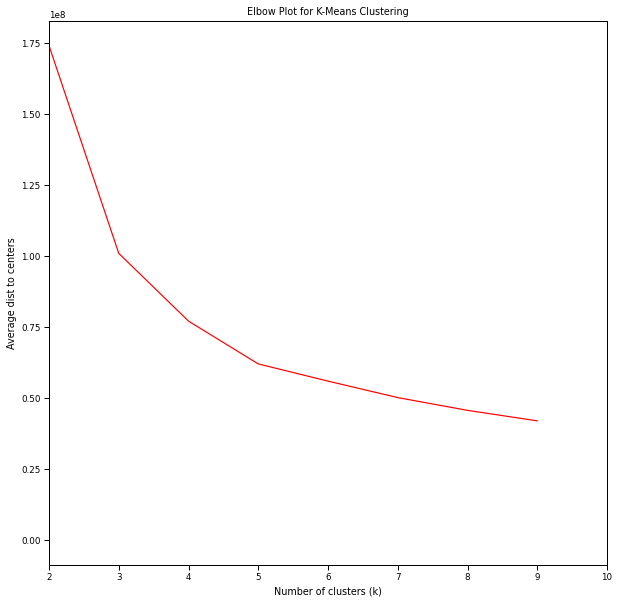

In [ ]:
#Offensive
max_n_clusters = 10 
iterations = 5000 
category_list = ['Age',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 '2K14',
 '2K15',
 '2K16']

squared_distance = np.zeros(max_n_clusters)
for k in range(2,max_n_clusters):
    kmeans = KMeans(n_clusters = k, max_iter = iterations).fit(nbac[category_list])
    squared_distance[k] = kmeans.inertia_
    
plt.figure(figsize=(10,10))
plt.plot(squared_distance,c='r')
plt.xlim((2,max_n_clusters))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average dist to centers')
plt.title('Elbow Plot for K-Means Clustering')
plt.show()

In [ ]:
numClusters = 5
km_ = KMeans(n_clusters = numClusters, max_iter = iterations)
km_.fit(nbac[category_list])
km_.labels_

array([4, 3, 3, 3, 1, 2, 2, 0, 0, 3, 0, 3, 1, 3, 1, 4, 3, 3, 3, 3, 2, 4,
       3, 2, 0, 1, 0, 3, 1, 0, 2, 3, 1, 3, 3, 0, 4, 3, 3, 0, 4, 4, 0, 3,
       2, 4, 4, 1, 3, 1, 0, 1, 4, 4, 1, 4, 0, 0, 2, 1, 3, 1, 0, 0, 0, 1,
       4, 0, 3, 0, 3, 2, 0, 3, 0, 1, 3, 1, 0, 3, 3, 4, 0, 0, 1, 4, 2, 0,
       4, 0, 0, 3, 0, 3, 4, 2, 1, 2, 2, 4, 4, 0, 2, 0, 0, 1, 3, 3, 4, 0,
       2, 3, 1, 4, 3, 1, 1, 1, 0, 2, 0, 4, 3, 3, 2, 0, 1, 2, 4, 1, 4, 0,
       1, 1, 3, 3, 0, 1, 0, 0, 4, 2, 4, 2, 4, 0, 0, 0, 3, 3, 3, 0, 1, 3,
       3, 4, 0, 3, 3, 1, 3, 3, 3, 0, 1, 0, 4, 3, 1, 1, 0, 1, 3, 0, 3, 2,
       1, 0, 0, 1, 4, 0, 0, 0, 1, 2, 0, 3, 4, 0, 4, 1, 3, 0, 1, 2, 4, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 3, 1, 3, 0, 1, 0, 4, 0, 3, 2, 1, 0, 1, 3,
       4, 0, 4, 1, 3, 3, 1, 4, 0, 4, 0, 3, 2, 4, 4, 0, 2, 0, 0, 4, 1, 3,
       0, 1, 2, 2, 2, 0, 0, 1, 3, 3, 2, 3, 4, 1, 0, 3, 4, 2, 2, 0, 4, 0,
       1, 3, 3, 4, 3, 2, 0, 1, 4, 0, 3, 4, 0, 3, 3, 0, 3, 4, 0, 0, 3, 1,
       3, 4, 3, 3, 1, 1, 2, 4, 3, 3, 4, 3, 1, 0, 3,

In [ ]:
#Cluster assignments
nba_of = nbac
nba_of['Pos'] = km_.labels_

In [ ]:
nba_of.groupby(['Pos'], as_index=False).agg('median')

,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,2P,2PA,2P%,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2K14,2K15,2K16,2K16_Predictions
0,0,26.0,67.0,22.0,1481.5,217.0,479.0,0.4355,50.0,156.0,175.0,356.5,0.4795,0.494,84.5,123.0,48.5,173.0,220.5,94.5,44.0,18.0,78.0,128.0,566.5,70.0,74.5,74.0,73.0
1,1,23.0,24.0,0.0,263.0,29.0,64.0,0.4020,4.0,17.0,20.0,46.0,0.4550,0.459,10.0,14.0,7.0,28.0,35.0,13.0,7.0,2.0,11.0,24.0,80.0,68.0,69.0,69.0,72.0
2,2,26.0,76.0,74.0,2455.0,494.0,1062.0,0.4660,70.0,216.0,429.0,883.0,0.4870,0.496,258.0,337.0,99.0,357.0,430.0,223.0,86.0,37.0,166.0,171.0,1301.0,82.0,83.0,83.0,73.0
3,3,26.0,50.0,12.0,894.0,117.0,273.0,0.4190,22.0,68.0,89.0,186.0,0.4670,0.480,46.0,64.0,28.0,106.0,138.0,56.0,27.0,11.0,45.0,76.0,304.0,69.0,73.0,72.0,72.0
4,4,26.0,76.0,61.0,2149.0,331.0,752.0,0.4390,87.0,246.0,250.0,506.0,0.4730,0.505,134.0,181.0,57.0,252.0,319.0,163.0,67.0,22.0,113.0,160.0,896.0,75.0,77.0,77.0,73.0


In [ ]:
agg = nba_of.groupby(['Pos'], as_index=False).agg('mean')
agg = agg.drop(columns=['Age', '2K16_Predictions', 'eFG%', '2P%', 'FG%', '2K14', '2K15', '2K16'])
agg

,Pos,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,57.253623,17.391304,1175.572464,165.166667,370.144928,33.913043,99.615942,131.253623,270.528986,69.905797,96.398551,55.963768,154.942029,210.905797,95.818841,35.159420,24.942029,62.637681,105.652174,434.152174
1,1,27.646617,4.323308,385.669173,48.691729,116.699248,12.789474,38.669173,35.902256,78.030075,20.015038,28.127820,15.496241,45.150376,60.646617,33.669173,12.962406,5.872180,20.857143,35.894737,130.187970
2,2,74.888889,70.825397,2465.682540,474.222222,1031.428571,80.968254,228.904762,393.253968,802.523810,244.031746,313.952381,104.142857,349.873016,454.015873,281.873016,89.190476,48.888889,160.825397,170.857143,1273.444444
3,3,71.125000,43.885417,1919.489583,282.020833,630.156250,67.156250,185.479167,214.864583,444.677083,123.489583,164.239583,84.927083,245.937500,330.864583,170.531250,61.302083,35.427083,104.322917,154.645833,754.687500


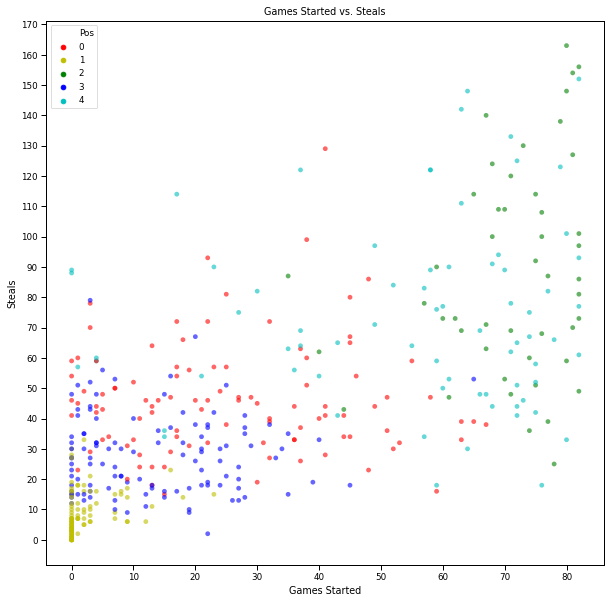

In [ ]:
#To visualize groups vs. different variable, replace x
fig = plt.figure(figsize=(10,10))
sns.set_context('paper')
nba_of['Pos'] = nba_of['Pos'].astype(str)

km_palette1 = ['r','y','g','b', 'c']

if numClusters == len(km_palette1):
  #TOV, ORB, FT, AST
    ax = sns.scatterplot(x='GS',y='STL',data=nba_of,
                        linewidth=0, alpha=0.6,
                        hue='Pos', palette=km_palette1)
    
    ax.set_xlabel('Games Started')
    ax.set_ylabel('Steals')
else:
    print("Palette is wrong length.")
    
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.title('Games Started vs. Steals');

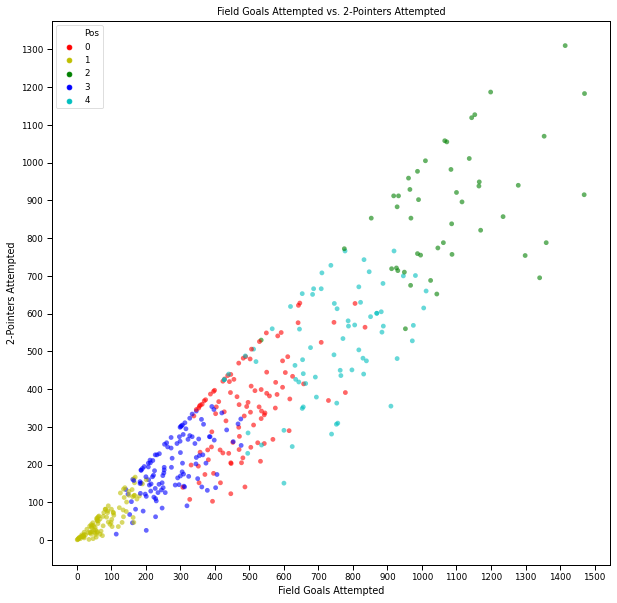

In [ ]:
#To visualize groups vs. different variable, replace x
fig = plt.figure(figsize=(10,10))
sns.set_context('paper')
nba_of['Pos'] = nba_of['Pos'].astype(str)

km_palette1 = ['r','y','g','b', 'c']

if numClusters == len(km_palette1):
  #TOV, ORB, FT, AST
    ax = sns.scatterplot(x='FGA',y='2PA',data=nba_of,
                        linewidth=0, alpha=0.6,
                        hue='Pos', palette=km_palette1)
    
    ax.set_xlabel('Field Goals Attempted')
    ax.set_ylabel('2-Pointers Attempted')
else:
    print("Palette is wrong length.")
    
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.title('Field Goals Attempted vs. 2-Pointers Attempted');

In [ ]:
#To visualize groups vs. different variable, replace x
fig = plt.figure(figsize=(10,10))
sns.set_context('paper')
nba_of['Pos'] = nba_of['Pos'].astype(str)

km_palette1 = ['r','y','g','b']

if numClusters == len(km_palette1):
    ax = sns.scatterplot(x='GS',y='FGA',data=nba_of,
                        linewidth=0, alpha=0.6,
                        hue='Pos', palette=km_palette1)
    
    ax.set_xlabel('Field Goals Attempted')
    ax.set_ylabel('2-Pointers Attempted')
else:
    print("Palette is wrong length.")
    
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.title('Field Goals Attempted vs. 2 Pointers');

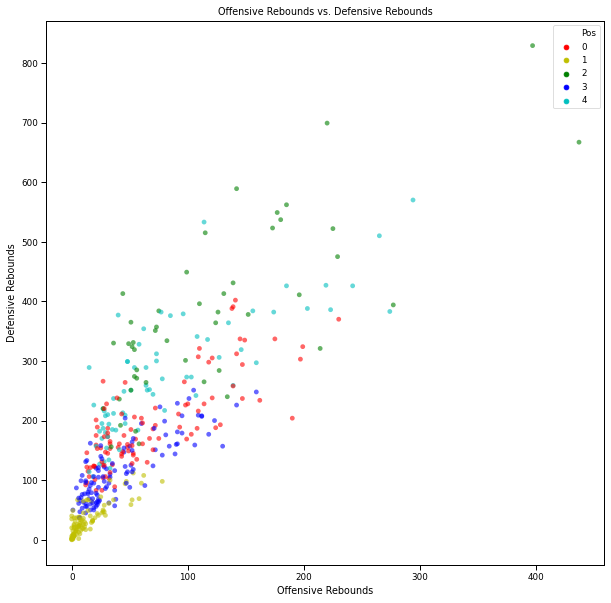

In [ ]:
#To visualize groups vs. different variable, replace x
fig = plt.figure(figsize=(10,10))
sns.set_context('paper')
nba_of['Pos'] = nba_of['Pos'].astype(str)

km_palette1 = ['r','y','g','b', 'c']

if numClusters == len(km_palette1):
    ax = sns.scatterplot(x='ORB',y='DRB',data=nba_of,
                        linewidth=0, alpha=0.6,
                        hue='Pos', palette=km_palette1)
    
    ax.set_xlabel('Offensive Rebounds')
    ax.set_ylabel('Defensive Rebounds')
else:
    print("Palette is wrong length.")
    
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.title('Offensive Rebounds vs. Defensive Rebounds');

In [ ]:
#To visualize groups vs. different variable, replace x
fig = plt.figure(figsize=(10,10))
sns.set_context('paper')
nba_of['Pos'] = nba_of['Pos'].astype(str)

km_palette1 = ['r','y','g','b', 'c']

if numClusters == len(km_palette1):
    ax = sns.scatterplot(x='DRB',y='STL',data=nba_of,
                        linewidth=0, alpha=0.6,
                        hue='Pos', palette=km_palette1)
    
    ax.set_xlabel('Offensive Rebounds')
    ax.set_ylabel('Defensive Rebounds')
else:
    print("Palette is wrong length.")
    
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.title('Offensive Rebounds vs. Defensive Rebounds');